In [ ]:
import time

# Start the timer at the beginning of your notebook
start_time = time.time()

In [ ]:
import pandas as pd
import numpy as np

import requests
import math
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables (example for wind_direction)
from sklearn.preprocessing import LabelEncoder

In [ ]:
from datetime import datetime
import pytz

# Define your local timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Replace with your timezone

# Get current UTC time
current_utc_time = datetime.utcnow().replace(tzinfo=pytz.utc)

# Convert UTC to local time
current_local_time = current_utc_time.astimezone(local_tz)

print("Current Local Time:", current_local_time)


Current Local Time: 2025-06-01 01:28:29.952913+05:30


In [ ]:
import math
from datetime import datetime, timedelta
import requests
import pandas as pd
import pytz

# Define your local timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Replace with your timezone

# API Key
API_KEY = "6fbf86cc0b0640b4a6983900253105"

def calculate_vpd(temp_c, relative_humidity):
    svp = 0.6108 * math.exp((17.27 * temp_c) / (temp_c + 237.3))  # Saturated vapor pressure
    avp = (relative_humidity / 100) * svp  # Actual vapor pressure
    vpd = svp - avp  # Vapor pressure deficit
    return round(vpd, 3)  # kPa rounded to 3 decimals

def fetch_weather_data(lat, lon):
    data_training = []
    # Get current local time
    current_local_time = datetime.now(local_tz)
    print("Current Local Time:", current_local_time)

    # Fetch hourly data for the past 7 days, including today
    for day_delta in range(7):
        date = current_local_time.date() - timedelta(days=day_delta)
        date_str = date.strftime("%Y-%m-%d")

        # Fetch hourly data for the specific date
        url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={lat},{lon}&dt={date_str}"
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Error fetching data for {date_str}: {response.status_code}")
            continue

        weather_json = response.json()
        forecast_day = weather_json.get("forecast", {}).get("forecastday", [])
        if not forecast_day:
            print(f"No forecast data available for {date_str}.")
            continue

        hours = forecast_day[0].get("hour", [])
        for hour in hours:
            temp_c = hour.get("temp_c")
            rh = hour.get("humidity")

            # Skip if temperature or humidity is missing
            if temp_c is None or rh is None:
                continue

            vpd = calculate_vpd(temp_c, rh)

            data_training.append({
                "datetime": hour["time"],
                "temperature_2m": temp_c,
                "dewpoint_2m": hour.get("dewpoint_c"),
                "apparent_temperature": hour.get("feelslike_c"),
                "wind_speed_10m": hour.get("wind_kph"),
                "wind_direction": hour.get("wind_dir"),
                "cloud_cover_avg": hour.get("cloud"),
                "surface_pressure": hour.get("pressure_mb"),
                "sealevel_pressure": hour.get("pressure_mb"),
                "rainfall": hour.get("precip_mm"),
                "snowfall": hour.get("snow", 0),
                "relative_humidity_2m": rh,
                "visibility": hour.get("vis_km"),
                "uv_index": hour.get("uv"),
                "chance_of_rain": hour.get("chance_of_rain", 0),
                "weather_condition": hour.get("condition", {}).get("text", "Unknown"),
                "vapour_pressure_deficit": vpd
            })

    # Convert to DataFrame
    df = pd.DataFrame(data_training)

    # Sort and filter the DataFrame
    df["datetime"] = pd.to_datetime(df["datetime"])  # Convert to datetime
    df = df.sort_values(by="datetime")  # Sort by datetime

    # Keep only rows that are before or equal to the current local time
    current_local_time_str = current_local_time.strftime('%Y-%m-%d %H:%M:%S')
    current_local_time_dt = pd.to_datetime(current_local_time_str)
    df = df[df["datetime"] <= current_local_time_dt]

    return df

# Example usage
df = fetch_weather_data(19.0760, 72.8777)  # Mumbai coordinates
print(df)


Current Local Time: 2025-06-01 01:28:29.999926+05:30
               datetime  temperature_2m  dewpoint_2m  apparent_temperature  \
144 2025-05-26 00:00:00            28.5         25.1                  33.8   
145 2025-05-26 01:00:00            28.2         25.0                  33.3   
146 2025-05-26 02:00:00            27.8         24.9                  32.6   
147 2025-05-26 03:00:00            27.4         24.8                  31.8   
148 2025-05-26 04:00:00            27.4         24.5                  31.6   
..                  ...             ...          ...                   ...   
45  2025-05-31 21:00:00            29.6         24.5                  34.9   
46  2025-05-31 22:00:00            29.5         24.7                  34.9   
47  2025-05-31 23:00:00            29.3         24.6                  34.5   
0   2025-06-01 00:00:00            29.2         23.6                  33.6   
1   2025-06-01 01:00:00            29.0         23.9                  33.5   

     wind_

In [ ]:
from datetime import datetime

# Get the current local time
current_time_local = datetime.now()
print("Current Local Time:", current_time_local)

# Get the current UTC time
current_time_utc = datetime.utcnow()
print("Current UTC Time:", current_time_utc)


Current Local Time: 2025-05-31 19:58:30.462710
Current UTC Time: 2025-05-31 19:58:30.462980


In [ ]:
data = fetch_weather_data(19.0760, 72.8777)

Current Local Time: 2025-06-01 01:28:30.469048+05:30


In [ ]:
data

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,wind_direction,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,relative_humidity_2m,visibility,uv_index,chance_of_rain,weather_condition,vapour_pressure_deficit
144,2025-05-26 00:00:00,28.5,25.1,33.8,20.2,W,52,1004.0,1004.0,1.80,0,82,10.0,0.0,100,Light rain shower,0.700
145,2025-05-26 01:00:00,28.2,25.0,33.3,23.4,WSW,58,1003.0,1003.0,2.54,0,83,7.0,0.0,100,Moderate or heavy rain shower,0.650
146,2025-05-26 02:00:00,27.8,24.9,32.6,23.8,W,77,1003.0,1003.0,3.62,0,84,7.0,0.0,100,Moderate or heavy rain shower,0.598
147,2025-05-26 03:00:00,27.4,24.8,31.8,24.1,W,91,1003.0,1003.0,3.47,0,86,7.0,0.0,100,Moderate or heavy rain shower,0.511
148,2025-05-26 04:00:00,27.4,24.5,31.6,27.4,W,76,1003.0,1003.0,2.02,0,84,10.0,0.0,100,Light rain shower,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2025-05-31 21:00:00,29.6,24.5,34.9,26.3,SW,74,1006.0,1006.0,0.07,0,74,10.0,0.0,45,Patchy rain possible,1.078
46,2025-05-31 22:00:00,29.5,24.7,34.9,24.8,SSW,81,1007.0,1007.0,0.02,0,76,10.0,0.0,45,Patchy rain possible,0.989
47,2025-05-31 23:00:00,29.3,24.6,34.5,23.8,SSW,75,1007.0,1007.0,0.05,0,76,10.0,0.0,45,Patchy rain possible,0.978
0,2025-06-01 00:00:00,29.2,23.6,33.6,20.2,SSW,80,1006.0,1006.0,0.04,0,72,10.0,0.0,45,Patchy rain possible,1.135


In [ ]:
df = pd.DataFrame(data)
df

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,wind_direction,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,relative_humidity_2m,visibility,uv_index,chance_of_rain,weather_condition,vapour_pressure_deficit
144,2025-05-26 00:00:00,28.5,25.1,33.8,20.2,W,52,1004.0,1004.0,1.80,0,82,10.0,0.0,100,Light rain shower,0.700
145,2025-05-26 01:00:00,28.2,25.0,33.3,23.4,WSW,58,1003.0,1003.0,2.54,0,83,7.0,0.0,100,Moderate or heavy rain shower,0.650
146,2025-05-26 02:00:00,27.8,24.9,32.6,23.8,W,77,1003.0,1003.0,3.62,0,84,7.0,0.0,100,Moderate or heavy rain shower,0.598
147,2025-05-26 03:00:00,27.4,24.8,31.8,24.1,W,91,1003.0,1003.0,3.47,0,86,7.0,0.0,100,Moderate or heavy rain shower,0.511
148,2025-05-26 04:00:00,27.4,24.5,31.6,27.4,W,76,1003.0,1003.0,2.02,0,84,10.0,0.0,100,Light rain shower,0.584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,2025-05-31 21:00:00,29.6,24.5,34.9,26.3,SW,74,1006.0,1006.0,0.07,0,74,10.0,0.0,45,Patchy rain possible,1.078
46,2025-05-31 22:00:00,29.5,24.7,34.9,24.8,SSW,81,1007.0,1007.0,0.02,0,76,10.0,0.0,45,Patchy rain possible,0.989
47,2025-05-31 23:00:00,29.3,24.6,34.5,23.8,SSW,75,1007.0,1007.0,0.05,0,76,10.0,0.0,45,Patchy rain possible,0.978
0,2025-06-01 00:00:00,29.2,23.6,33.6,20.2,SSW,80,1006.0,1006.0,0.04,0,72,10.0,0.0,45,Patchy rain possible,1.135


In [ ]:
'''def fetch_weather_data_training(lat, lon):
    data_training = []
    today = datetime.utcnow().date()

    # Fetch hourly data for previous 6 days (excluding today)
    for day_delta in range(1, 7):  # days 1 to 6 ago
        date = today - timedelta(days=day_delta)
        date_str = date.strftime("%Y-%m-%d")

        url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={lat},{lon}&dt={date_str}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error fetching training data for {date_str}: {response.status_code}")
            continue

        weather_json = response.json()
        forecast_day = weather_json.get("forecast", {}).get("forecastday", [])
        if not forecast_day:
            print(f"No training forecast data available for {date_str}.")
            continue

        hours = forecast_day[0].get("hour", [])
        for hour in hours:
            temp_c = hour.get("temp_c")
            rh = hour.get("humidity")
            if temp_c is None or rh is None:
                continue

            vpd = calculate_vpd(temp_c, rh)
            data_training.append({
                "datetime": hour["time"],
                "temperature_2m": temp_c,
                "dewpoint_2m": hour.get("dewpoint_c"),
                "apparent_temperature": hour.get("feelslike_c"),
                "wind_speed_10m": hour.get("wind_kph"),
                "wind_direction": hour.get("wind_dir"),
                "cloud_cover_avg": hour.get("cloud"),
                "surface_pressure": hour.get("pressure_mb"),
                "sealevel_pressure": hour.get("pressure_mb"),
                "rainfall": hour.get("precip_mm"),
                "snowfall": hour.get("snow", 0),
                "relative_humidity_2m": rh,
                "visibility": hour.get("vis_km"),
                "uv_index": hour.get("uv"),
                "chance_of_rain": hour.get("chance_of_rain", 0),
                "weather_condition": hour.get("condition", {}).get("text", "Unknown"),
                "vapour_pressure_deficit": vpd
            })

    return data_training


def fetch_weather_data_testing(lat, lon):
    data_testing = []
    today = datetime.utcnow().date()
    yesterday = today - timedelta(days=1)
    date_str = yesterday.strftime("%Y-%m-%d")

    url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={lat},{lon}&dt={date_str}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error fetching testing data for {date_str}: {response.status_code}")
        return data_testing

    weather_json = response.json()
    forecast_day = weather_json.get("forecast", {}).get("forecastday", [])
    if not forecast_day:
        print(f"No testing forecast data available for {date_str}.")
        return data_testing

    hours = forecast_day[0].get("hour", [])
    for hour in hours:
        temp_c = hour.get("temp_c")
        rh = hour.get("humidity")
        if temp_c is None or rh is None:
            continue

        vpd = calculate_vpd(temp_c, rh)
        data_testing.append({
            "datetime": hour["time"],
            "temperature_2m": temp_c,
            "dewpoint_2m": hour.get("dewpoint_c"),
            "apparent_temperature": hour.get("feelslike_c"),
            "wind_speed_10m": hour.get("wind_kph"),
            "wind_direction": hour.get("wind_dir"),
            "cloud_cover_avg": hour.get("cloud"),
            "surface_pressure": hour.get("pressure_mb"),
            "sealevel_pressure": hour.get("pressure_mb"),
            "rainfall": hour.get("precip_mm"),
            "snowfall": hour.get("snow", 0),
            "relative_humidity_2m": rh,
            "visibility": hour.get("vis_km"),
            "uv_index": hour.get("uv"),
            "chance_of_rain": hour.get("chance_of_rain", 0),
            "weather_condition": hour.get("condition", {}).get("text", "Unknown"),
            "vapour_pressure_deficit": vpd
        })

    return data_testing


test = fetch_weather_data_testing(19.0760, 72.8777)
train = fetch_weather_data_training(19.0760, 72.8777)'''

'def fetch_weather_data_training(lat, lon):\n    data_training = []\n    today = datetime.utcnow().date()\n\n    # Fetch hourly data for previous 6 days (excluding today)\n    for day_delta in range(1, 7):  # days 1 to 6 ago\n        date = today - timedelta(days=day_delta)\n        date_str = date.strftime("%Y-%m-%d")\n\n        url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={lat},{lon}&dt={date_str}"\n        response = requests.get(url)\n        if response.status_code != 200:\n            print(f"Error fetching training data for {date_str}: {response.status_code}")\n            continue\n\n        weather_json = response.json()\n        forecast_day = weather_json.get("forecast", {}).get("forecastday", [])\n        if not forecast_day:\n            print(f"No training forecast data available for {date_str}.")\n            continue\n\n        hours = forecast_day[0].get("hour", [])\n        for hour in hours:\n            temp_c = hour.get("temp_c")\n            r

In [ ]:
import pandas as pd
from datetime import timedelta

def add_future_features_df(df):
    # Make sure datetime column is datetime type
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Sort by datetime
    df = df.sort_values('datetime').reset_index(drop=True)

    # For each hour from 1 to 5, create new columns with shifted values
    for h in range(1, 6):
        df[f'temperature_2m_{h}h'] = df['temperature_2m'].shift(-h)
        df[f'rainfall_{h}h'] = df['rainfall'].shift(-h)
        df[f'relative_humidity_2m_{h}h'] = df['relative_humidity_2m'].shift(-h)

    return df
df2 = add_future_features_df(df)
df2.tail(50)

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,wind_direction,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,...,relative_humidity_2m_2h,temperature_2m_3h,rainfall_3h,relative_humidity_2m_3h,temperature_2m_4h,rainfall_4h,relative_humidity_2m_4h,temperature_2m_5h,rainfall_5h,relative_humidity_2m_5h
96,2025-05-30 00:00:00,29.5,24.1,34.4,23.0,WSW,65,1003.0,1003.0,0.05,...,75.0,29.1,0.13,76.0,29.1,0.11,75.0,29.3,0.08,74.0
97,2025-05-30 01:00:00,29.3,24.2,34.3,22.7,WSW,62,1002.0,1002.0,0.08,...,76.0,29.1,0.11,75.0,29.3,0.08,74.0,29.4,0.06,74.0
98,2025-05-30 02:00:00,29.2,24.3,34.2,23.0,WSW,55,1001.0,1001.0,0.11,...,75.0,29.3,0.08,74.0,29.4,0.06,74.0,29.6,0.05,72.0
99,2025-05-30 03:00:00,29.1,24.4,34.0,23.0,WSW,83,1001.0,1001.0,0.13,...,74.0,29.4,0.06,74.0,29.6,0.05,72.0,29.9,0.03,71.0
100,2025-05-30 04:00:00,29.1,24.2,34.0,22.0,WSW,80,1001.0,1001.0,0.11,...,74.0,29.6,0.05,72.0,29.9,0.03,71.0,29.8,0.02,71.0
101,2025-05-30 05:00:00,29.3,24.2,34.2,20.9,WSW,80,1002.0,1002.0,0.08,...,72.0,29.9,0.03,71.0,29.8,0.02,71.0,30.1,0.02,72.0
102,2025-05-30 06:00:00,29.4,24.2,34.3,20.5,WSW,78,1002.0,1002.0,0.06,...,71.0,29.8,0.02,71.0,30.1,0.02,72.0,30.3,0.03,72.0
103,2025-05-30 07:00:00,29.6,24.0,34.4,21.2,WSW,77,1003.0,1003.0,0.05,...,71.0,30.1,0.02,72.0,30.3,0.03,72.0,30.6,0.01,71.0
104,2025-05-30 08:00:00,29.9,24.0,34.9,22.0,WSW,75,1004.0,1004.0,0.03,...,72.0,30.3,0.03,72.0,30.6,0.01,71.0,30.7,0.01,71.0
105,2025-05-30 09:00:00,29.8,24.1,34.9,22.7,WSW,79,1004.0,1004.0,0.02,...,72.0,30.6,0.01,71.0,30.7,0.01,71.0,30.8,0.01,70.0


In [ ]:
main_prediction_row_current_feature = df2.iloc[-1]
print(main_prediction_row_current_feature)

datetime                    2025-06-01 01:00:00
temperature_2m                             29.0
dewpoint_2m                                23.9
apparent_temperature                       33.5
wind_speed_10m                             23.4
wind_direction                              SSW
cloud_cover_avg                              81
surface_pressure                         1006.0
sealevel_pressure                        1006.0
rainfall                                   0.05
snowfall                                      0
relative_humidity_2m                         74
visibility                                 10.0
uv_index                                    0.0
chance_of_rain                               45
weather_condition          Patchy rain possible
vapour_pressure_deficit                   1.041
temperature_2m_1h                           NaN
rainfall_1h                                 NaN
relative_humidity_2m_1h                     NaN
temperature_2m_2h                       

In [ ]:
df3 = df2.copy()  # Make a copy to avoid SettingWithCopyWarning

df3['hour'] = df3['datetime'].dt.hour
df3['hour_sin'] = np.sin(2 * np.pi * df3['hour'] / 24)
df3['hour_cos'] = np.cos(2 * np.pi * df3['hour'] / 24)
df = df3

In [ ]:
import numpy as np

# Define a mapping of wind direction to degrees
wind_direction_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Map the wind directions to degrees
df['wind_degrees'] = df['wind_direction'].map(wind_direction_to_degrees)

# Convert degrees into two components (wind_x and wind_y)
df['wind_x'] = np.cos(np.radians(df['wind_degrees']))
df['wind_y'] = np.sin(np.radians(df['wind_degrees']))

# Drop the original wind_direction column
df.drop(columns=['wind_direction'], inplace=True)



In [ ]:
df['weather_condition'].unique()
# This is very useful in rain prediction

array(['Light rain shower', 'Moderate or heavy rain shower',
       'Patchy rain possible', 'Patchy light drizzle',
       'Thundery outbreaks possible', 'Patchy light rain with thunder',
       'Sunny', 'Partly cloudy'], dtype=object)

In [ ]:
#Weather condition

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded = encoder.fit_transform(df[['weather_condition']])
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
df = pd.concat([df, df_encoded], axis=1).drop(columns=['weather_condition'])


# Temperature

**Temperature**

In [ ]:
df

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,...,wind_degrees,wind_x,wind_y,weather_condition_Moderate or heavy rain shower,weather_condition_Partly cloudy,weather_condition_Patchy light drizzle,weather_condition_Patchy light rain with thunder,weather_condition_Patchy rain possible,weather_condition_Sunny,weather_condition_Thundery outbreaks possible
0,2025-05-26 00:00:00,28.5,25.1,33.8,20.2,52,1004.0,1004.0,1.80,0,...,270.0,-1.836970e-16,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-05-26 01:00:00,28.2,25.0,33.3,23.4,58,1003.0,1003.0,2.54,0,...,247.5,-3.826834e-01,-0.923880,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-05-26 02:00:00,27.8,24.9,32.6,23.8,77,1003.0,1003.0,3.62,0,...,270.0,-1.836970e-16,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-05-26 03:00:00,27.4,24.8,31.8,24.1,91,1003.0,1003.0,3.47,0,...,270.0,-1.836970e-16,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-05-26 04:00:00,27.4,24.5,31.6,27.4,76,1003.0,1003.0,2.02,0,...,270.0,-1.836970e-16,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2025-05-31 21:00:00,29.6,24.5,34.9,26.3,74,1006.0,1006.0,0.07,0,...,225.0,-7.071068e-01,-0.707107,0.0,0.0,0.0,0.0,1.0,0.0,0.0
142,2025-05-31 22:00:00,29.5,24.7,34.9,24.8,81,1007.0,1007.0,0.02,0,...,202.5,-9.238795e-01,-0.382683,0.0,0.0,0.0,0.0,1.0,0.0,0.0
143,2025-05-31 23:00:00,29.3,24.6,34.5,23.8,75,1007.0,1007.0,0.05,0,...,202.5,-9.238795e-01,-0.382683,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144,2025-06-01 00:00:00,29.2,23.6,33.6,20.2,80,1006.0,1006.0,0.04,0,...,202.5,-9.238795e-01,-0.382683,0.0,0.0,0.0,0.0,1.0,0.0,0.0


datetime                                            datetime64[ns]
temperature_2m                                             float64
dewpoint_2m                                                float64
apparent_temperature                                       float64
wind_speed_10m                                             float64
cloud_cover_avg                                              int64
surface_pressure                                           float64
sealevel_pressure                                          float64
rainfall                                                   float64
snowfall                                                     int64
relative_humidity_2m                                         int64
visibility                                                 float64
uv_index                                                   float64
chance_of_rain                                               int64
vapour_pressure_deficit                                    flo

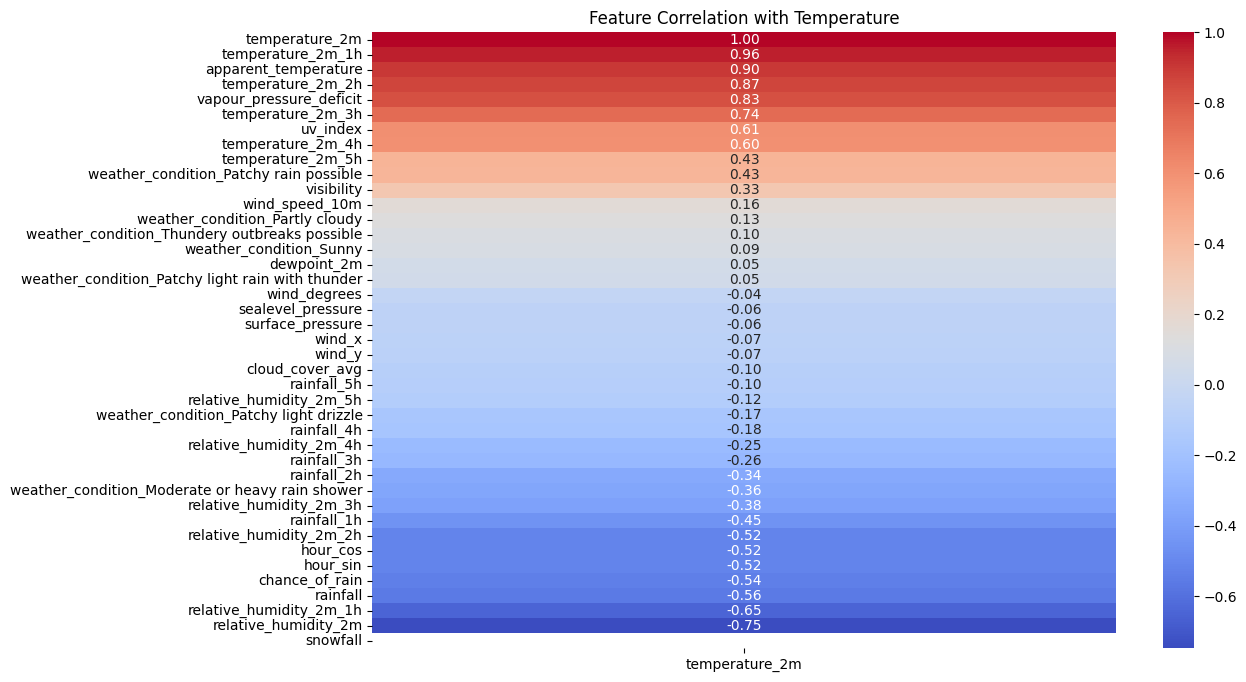

In [ ]:


if 'wind_direction' in df.columns:
    label_encoder = LabelEncoder()
    df['wind_direction_encoded'] = label_encoder.fit_transform(df['wind_direction'])
    df = df.drop(columns=['wind_direction'])  # Drop original column if not needed

# Check if all columns are numeric
print(df.dtypes)

# Ensure all columns used in the correlation are numeric
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['temperature_2m']].sort_values(by='temperature_2m', ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Feature Correlation with Temperature")
plt.show()


In [ ]:
corm = corr_matrix[['temperature_2m']].sort_values(by='temperature_2m', ascending=False)
corm

,temperature_2m
temperature_2m,1.000000
temperature_2m_1h,0.956020
apparent_temperature,0.903246
temperature_2m_2h,0.865493
vapour_pressure_deficit,0.832171
temperature_2m_3h,0.742536
uv_index,0.607556
temperature_2m_4h,0.599894
temperature_2m_5h,0.434204
weather_condition_Patchy rain possible,0.426758


In [ ]:
# Filter columns with absolute correlation greater than 0.5
threshold = 0.25
correlated_features = corm[abs(corm['temperature_2m']) > threshold].index.tolist()

# Display the selected features


dft = df.drop(columns=[col for col in correlated_features if not col in df.columns])

In [ ]:
dft.columns

Index(['datetime', 'temperature_2m', 'dewpoint_2m', 'apparent_temperature',
       'wind_speed_10m', 'cloud_cover_avg', 'surface_pressure',
       'sealevel_pressure', 'rainfall', 'snowfall', 'relative_humidity_2m',
       'visibility', 'uv_index', 'chance_of_rain', 'vapour_pressure_deficit',
       'temperature_2m_1h', 'rainfall_1h', 'relative_humidity_2m_1h',
       'temperature_2m_2h', 'rainfall_2h', 'relative_humidity_2m_2h',
       'temperature_2m_3h', 'rainfall_3h', 'relative_humidity_2m_3h',
       'temperature_2m_4h', 'rainfall_4h', 'relative_humidity_2m_4h',
       'temperature_2m_5h', 'rainfall_5h', 'relative_humidity_2m_5h', 'hour',
       'hour_sin', 'hour_cos', 'wind_degrees', 'wind_x', 'wind_y',
       'weather_condition_Moderate or heavy rain shower',
       'weather_condition_Partly cloudy',
       'weather_condition_Patchy light drizzle',
       'weather_condition_Patchy light rain with thunder',
       'weather_condition_Patchy rain possible', 'weather_condition_Sunny

In [ ]:
# Columns to use as features (X)
feature_cols = [
    "temperature_2m",
    "dewpoint_2m",
    "visibility",
    "uv_index",
    "vapour_pressure_deficit",
    "chance_of_rain",
    "apparent_temperature",
    "rainfall",
    "weather_condition_Moderate or heavy rain shower",
    "weather_condition_Partly cloudy",
    "weather_condition_Patchy rain possible",
    "relative_humidity_2m",
    "wind_speed_10m",
    "cloud_cover_avg",
    "surface_pressure",
    "hour_sin",
    "hour_cos"
]


# Columns to use as targets (Y) - future temperature predictions
target_cols = [
    "temperature_2m_1h",
    "temperature_2m_2h",
    "temperature_2m_3h",
    "temperature_2m_4h",
    "temperature_2m_5h"
]

# Prepare X and Y from your DataFrame `df3`
X = dft[feature_cols]
Y = dft[target_cols]


In [ ]:
dft

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,...,wind_degrees,wind_x,wind_y,weather_condition_Moderate or heavy rain shower,weather_condition_Partly cloudy,weather_condition_Patchy light drizzle,weather_condition_Patchy light rain with thunder,weather_condition_Patchy rain possible,weather_condition_Sunny,weather_condition_Thundery outbreaks possible
0,2025-05-26 00:00:00,28.5,25.1,33.8,20.2,52,1004.0,1004.0,1.80,0,...,270.0,-1.836970e-16,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-05-26 01:00:00,28.2,25.0,33.3,23.4,58,1003.0,1003.0,2.54,0,...,247.5,-3.826834e-01,-0.923880,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-05-26 02:00:00,27.8,24.9,32.6,23.8,77,1003.0,1003.0,3.62,0,...,270.0,-1.836970e-16,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025-05-26 03:00:00,27.4,24.8,31.8,24.1,91,1003.0,1003.0,3.47,0,...,270.0,-1.836970e-16,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-05-26 04:00:00,27.4,24.5,31.6,27.4,76,1003.0,1003.0,2.02,0,...,270.0,-1.836970e-16,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2025-05-31 21:00:00,29.6,24.5,34.9,26.3,74,1006.0,1006.0,0.07,0,...,225.0,-7.071068e-01,-0.707107,0.0,0.0,0.0,0.0,1.0,0.0,0.0
142,2025-05-31 22:00:00,29.5,24.7,34.9,24.8,81,1007.0,1007.0,0.02,0,...,202.5,-9.238795e-01,-0.382683,0.0,0.0,0.0,0.0,1.0,0.0,0.0
143,2025-05-31 23:00:00,29.3,24.6,34.5,23.8,75,1007.0,1007.0,0.05,0,...,202.5,-9.238795e-01,-0.382683,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144,2025-06-01 00:00:00,29.2,23.6,33.6,20.2,80,1006.0,1006.0,0.04,0,...,202.5,-9.238795e-01,-0.382683,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

def iterative_fill(df, target_cols, feature_cols):
    """
    df: pandas DataFrame containing original features and shifted target columns.
    target_cols: list of target columns to predict in order, e.g. ['temp_1h', 'temp_2h', ..., 'temp_5h']
    feature_cols: list of feature columns to use for training and prediction.

    Returns:
    df_filled: DataFrame with missing values in target_cols filled iteratively.
    """

    df_filled = df.copy()

    for i, target_col in enumerate(target_cols):
        print(f"\nPredicting and filling missing values for: {target_col}")

        # Select rows where target_col is NOT null for training
        train_df = df_filled[df_filled[target_col].notna()]

        # Select rows where target_col IS null for prediction
        predict_df = df_filled[df_filled[target_col].isna()]

        if predict_df.empty:
            print(f"No missing values to fill for {target_col}")
            continue

        # Features for training: all features + previously predicted target columns (up to current)
        current_features = feature_cols + target_cols[:i]

        # Drop rows with NaNs in features or target from training set
        train_df = train_df.dropna(subset=current_features + [target_col])

        if train_df.empty:
            print(f"No sufficient data to train model for {target_col}")
            continue

        X_train = train_df[current_features]
        y_train = train_df[target_col]

        # For prediction rows, features must also be available (drop rows with NaN in features)
        predict_df = predict_df.dropna(subset=current_features)

        if predict_df.empty:
            print(f"No rows with enough features to predict for {target_col}")
            continue

        X_predict = predict_df[current_features]

        # Train the model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict missing values
        y_pred = model.predict(X_predict)

        # Fill predicted values back into the DataFrame
        df_filled.loc[X_predict.index, target_col] = y_pred

        print(f"Filled {len(y_pred)} missing values for {target_col}")

    return df_filled


# Example usage:

# Let's assume you have a DataFrame `df` with these columns:
# 'temperature', 'humidity', 'wind_speed', ... (your base features)
# and 5 shifted target columns: 'temp_1h', 'temp_2h', 'temp_3h', 'temp_4h', 'temp_5h'

# Base features you want to use:
base_features =  feature_cols # replace with your actual features

# Target columns in order:
targets = target_cols

# Run iterative fill:
df_filled = iterative_fill(df, targets, base_features)

# After this, df_filled will have no NaNs in the target columns (assuming predictions succeeded)



Predicting and filling missing values for: temperature_2m_1h
Filled 1 missing values for temperature_2m_1h

Predicting and filling missing values for: temperature_2m_2h
Filled 2 missing values for temperature_2m_2h

Predicting and filling missing values for: temperature_2m_3h
Filled 3 missing values for temperature_2m_3h

Predicting and filling missing values for: temperature_2m_4h
Filled 4 missing values for temperature_2m_4h

Predicting and filling missing values for: temperature_2m_5h
Filled 5 missing values for temperature_2m_5h


In [ ]:
main_prediction_row_current_feature = df_filled.iloc[-1]
print(main_prediction_row_current_feature)

datetime                                            2025-06-01 01:00:00
temperature_2m                                                     29.0
dewpoint_2m                                                        23.9
apparent_temperature                                               33.5
wind_speed_10m                                                     23.4
cloud_cover_avg                                                      81
surface_pressure                                                 1006.0
sealevel_pressure                                                1006.0
rainfall                                                           0.05
snowfall                                                              0
relative_humidity_2m                                                 74
visibility                                                         10.0
uv_index                                                            0.0
chance_of_rain                                                  

In [ ]:

# End the timer at the end of your notebook
end_time = time.time()

# Calculate the total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time:.2f} seconds")

Total runtime: 5.36 seconds


# Humidity